## Reading dataset retrieved form kaggle

### https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set?resource=download

In [2]:
import pandas as pd

### Parsing data samples

In [3]:
from io import StringIO

data = """
Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
"""

# Convert the string to a file-like object
data = StringIO(data)

# Read the data
df = pd.read_csv(data, sep=";", decimal = ",")

# Print the DataFrame
print(df)

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6         1360       150      11.9   
1  10/03/2004  19.00.00     2.0         1292       112       9.4   
2  10/03/2004  20.00.00     2.2         1402        88       9.0   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  


### Parsing data from CSV

In [4]:
aq = pd.read_csv("AirQuality.csv", sep = ";", decimal = ",")        
aq.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


## Time Series 
Let's visualize the CO / temperature in hourly basis.


In [10]:
#For dealing with time string types
import datetime

In [13]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
 17  DateTime       9357 non-null   object 
dtypes: float

To remove the rows with NaN values instead, you can use the dropna function

In [14]:
aq = aq.dropna(subset=['DateTime'])

Convert the ‘DateTime’ column to datetime format. 

In [15]:
aq['DateTime'] =  (aq.Date) + ' ' + (aq.Time)
aq.DateTime = aq.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))
aq

C:\Users\Joseph\AppData\Local\Temp\ipykernel_6220\2034369123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq['DateTime'] =  (aq.Date) + ' ' + (aq.Time)
C:\Users\Joseph\AppData\Local\Temp\ipykernel_6220\2034369123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq.DateTime = aq.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,DateTime
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN,2004-03-10 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,NaN,NaN,2005-04-04 10:00:00
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,NaN,NaN,2005-04-04 11:00:00
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,NaN,NaN,2005-04-04 12:00:00
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,NaN,NaN,2005-04-04 13:00:00


In [16]:
aq['Weekday'] = aq['DateTime'].dt.day_name()
aq['Month']   = aq['DateTime'].dt.month_name()
aq['Hour']    = aq['DateTime'].dt.hour
aq['Date']    = pd.to_datetime(aq['Date'], format='%d/%m/%Y')
aq.drop('Time', axis=1, inplace=True, errors = 'ignore') 
aq.head()

C:\Users\Joseph\AppData\Local\Temp\ipykernel_6220\411182946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq['Weekday'] = aq['DateTime'].dt.day_name()
C:\Users\Joseph\AppData\Local\Temp\ipykernel_6220\411182946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq['Month']   = aq['DateTime'].dt.month_name()
C:\Users\Joseph\AppData\Local\Temp\ipykernel_6220\411182946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,DateTime,Weekday,Month,Hour
0,2004-03-10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN,2004-03-10 18:00:00,Wednesday,March,18
1,2004-03-10,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN,2004-03-10 19:00:00,Wednesday,March,19
2,2004-03-10,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN,2004-03-10 20:00:00,Wednesday,March,20
3,2004-03-10,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN,2004-03-10 21:00:00,Wednesday,March,21
4,2004-03-10,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN,2004-03-10 22:00:00,Wednesday,March,22


In [17]:
aq = aq[['Date','Month', 'Weekday','DateTime', 'Hour', 'CO(GT)','PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
         'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
aq.head()

,Date,Month,Weekday,DateTime,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,March,Wednesday,2004-03-10 18:00:00,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,March,Wednesday,2004-03-10 19:00:00,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,March,Wednesday,2004-03-10 20:00:00,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,March,Wednesday,2004-03-10 21:00:00,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,March,Wednesday,2004-03-10 22:00:00,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [18]:
month_df_list = []
day_df_list   = []
hour_df_list  = []

months = ['January','February','March', 'April', 'May','June', 
          'July', 'August', 'September', 'October', 'November', 'December']

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for month in months:
    temp_df = aq.loc[(aq['Month'] == month)]
    month_df_list.append(temp_df)

for day in days:
    temp_df = aq.loc[(aq['Weekday'] == day)]
    day_df_list.append(temp_df)

for hour in range(24):
    temp_df = aq.loc[(aq['Hour'] == hour)]
    hour_df_list.append(temp_df)

In [23]:
!pip install matplotlib

  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
  Using cached pillow-10.2.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl (56 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.2.0-cp39-cp39-win_amd64.whl (181 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)


You should consider upgrading via the 'D:\soch1\Projects\IoT_course\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [24]:
#For plotting
import matplotlib.pyplot as plt

In [25]:

def df_time_plotter(df_list, time_unit, y_col):
    
    months = ['January','February','March', 'April', 'May','June', 
              'July', 'August', 'September', 'October', 'November', 'December']
    
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    if time_unit == 'M':
        nRows = 3
        nCols = 4
        n_iter = len(months)
    elif time_unit == 'D':
        nRows = 2
        nCols = 4
        n_iter = len(days)
    elif time_unit == 'H':
        nRows = 4
        nCols = 6
        n_iter = 24
    else:
        print('time_unit must be a string equal to M,D, or H')
        return 0
        
    fig, axs = plt.subplots(nrows=nRows, ncols=nCols, figsize = (40,30))
    axs = axs.ravel()
    for i in range(n_iter):
        data = df_list[i]
        ax = axs[i]
        data.plot(kind ='scatter', x = 'DateTime', y= y_col , ax = ax, fontsize = 24)
        ax.set_ylabel('Pollutant Concentration',fontsize=30)
        ax.set_xlabel('')
        if time_unit == 'M':
            ax.set_title(y_col + ' ' + months[i],  size=40) # Title
        elif time_unit == 'D':
            ax.set_title(y_col + ' ' + days[i],  size=40) # Title
        else:
             ax.set_title(y_col + ' ' + str(i),  size=40) # Title
        ax.tick_params(labelrotation=60)

        #plt.xlim([datetime.date(2004, 3, 10), datetime.date(2004, 3, 30)])
    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
    plt.show() # Depending on whether you use IPython or interactive mode, etc.

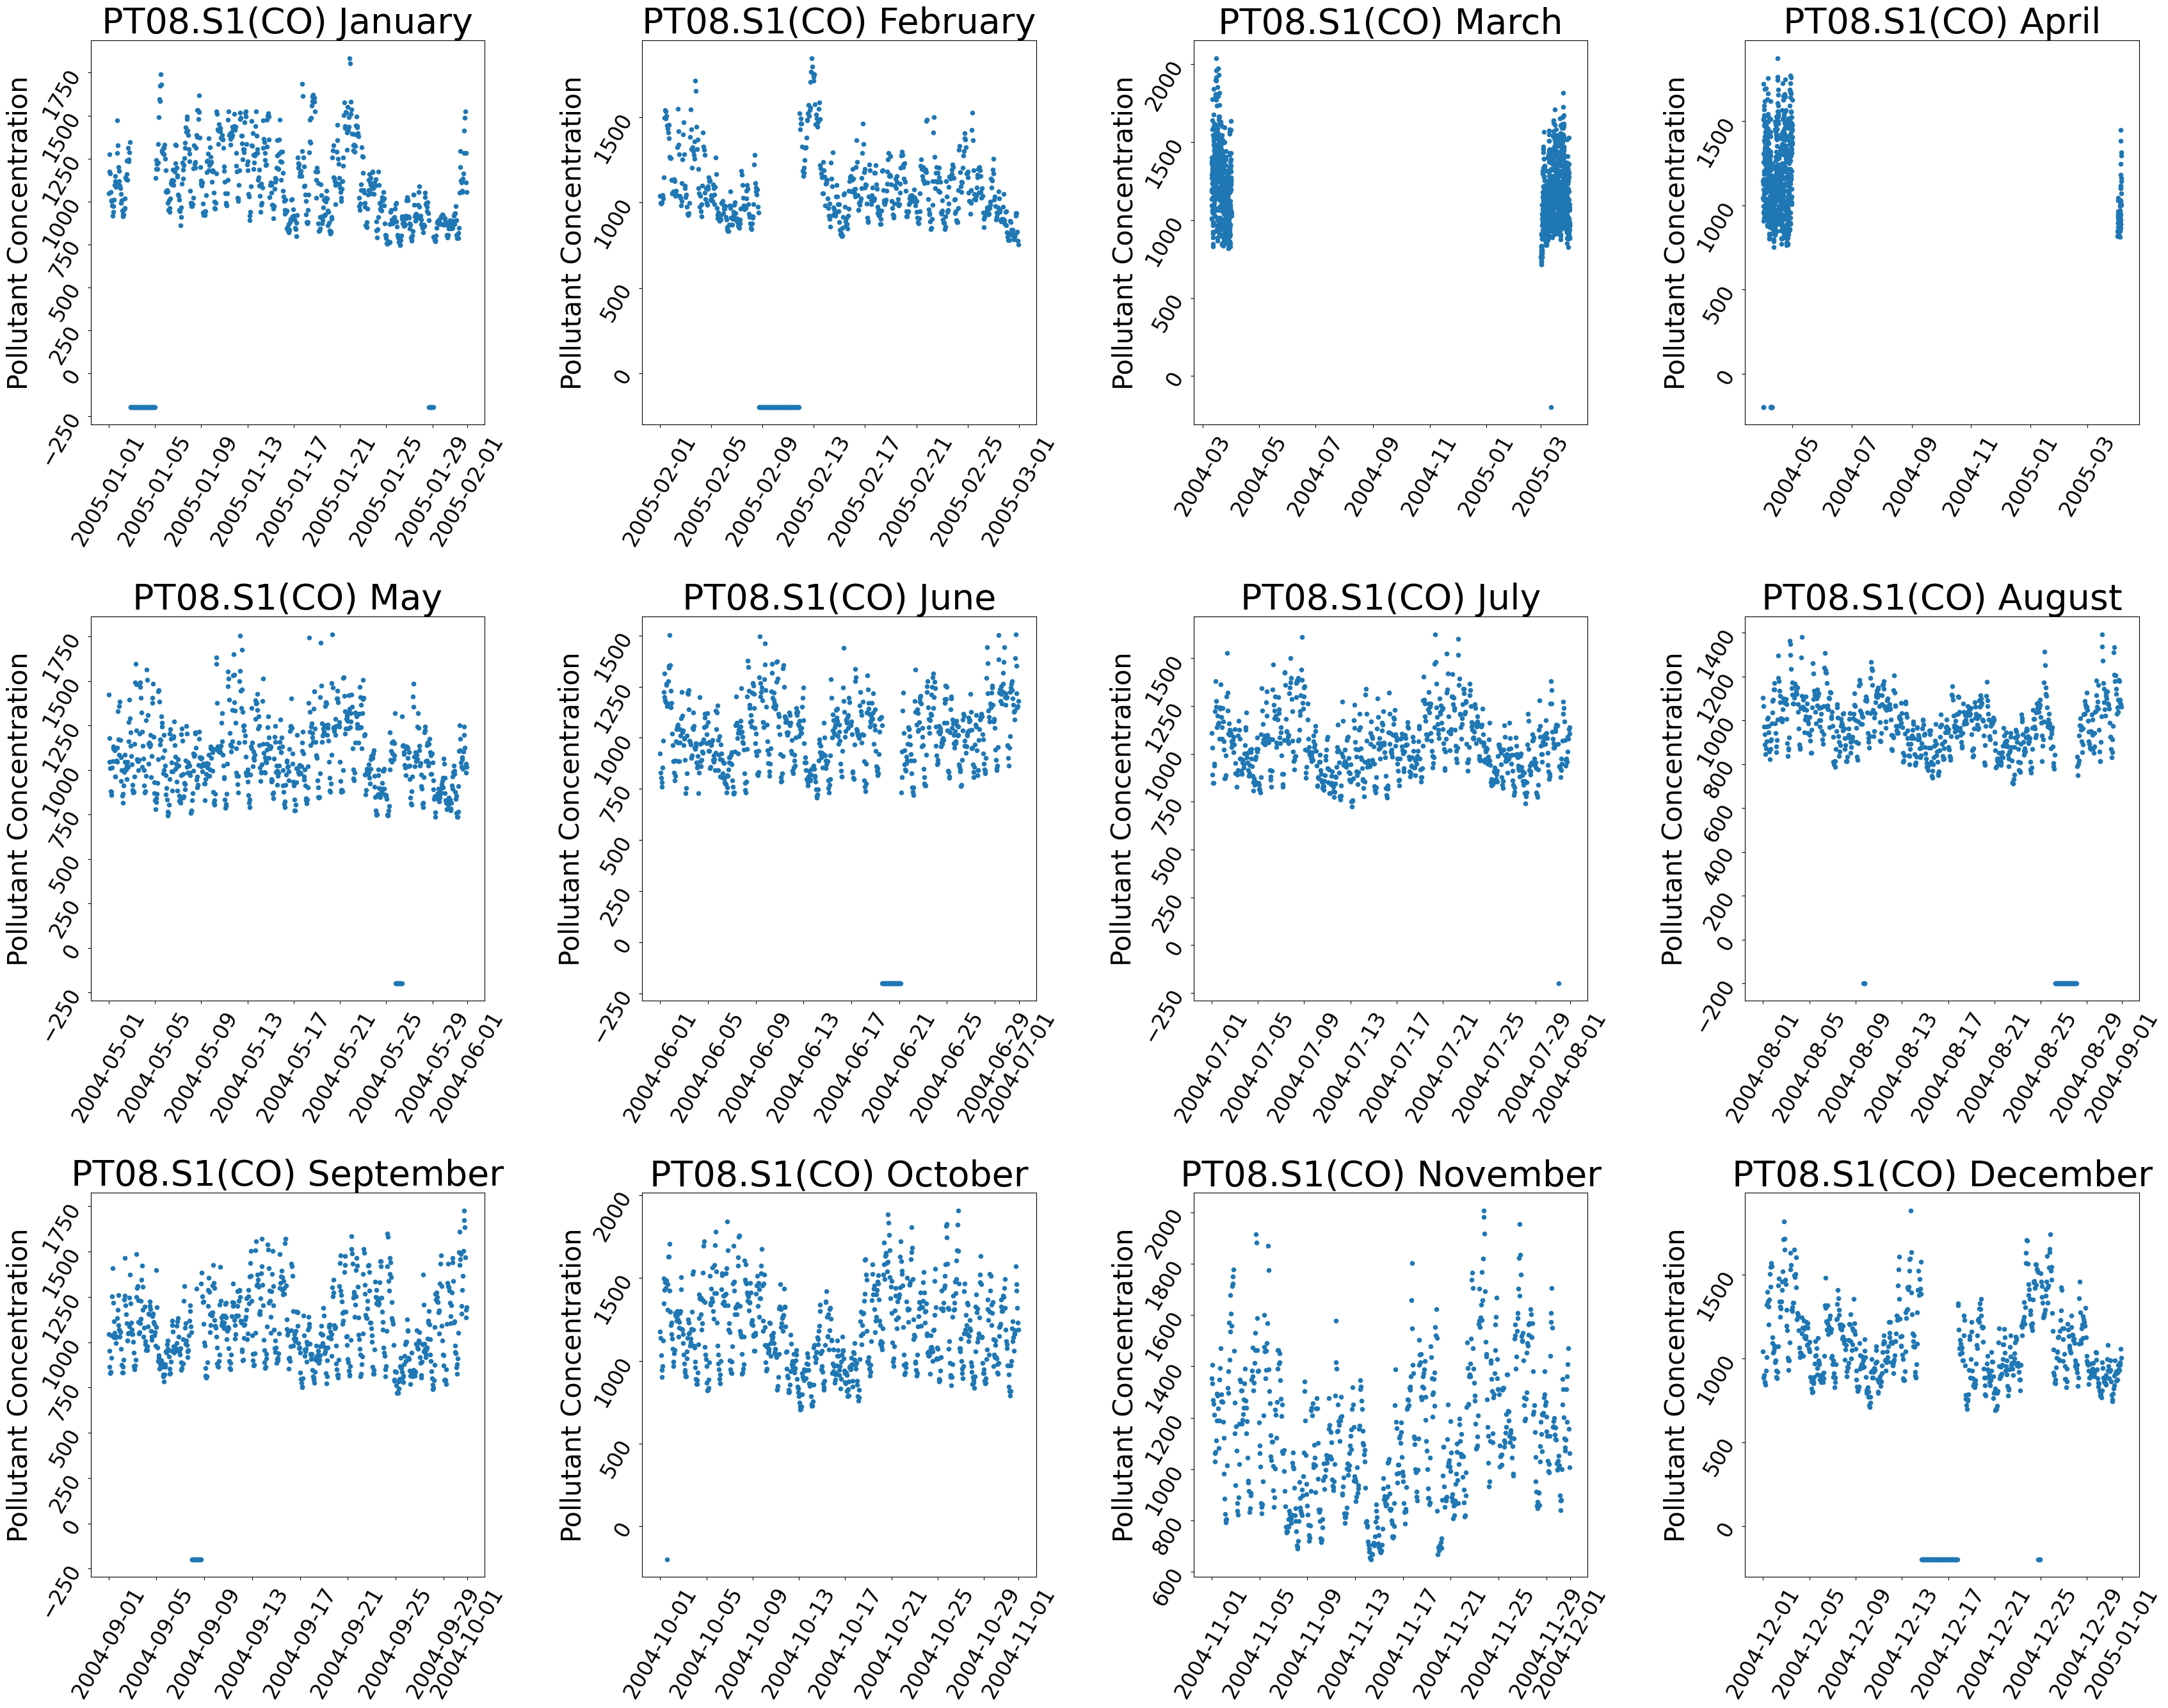

In [26]:
df_time_plotter(month_df_list,'M','PT08.S1(CO)')